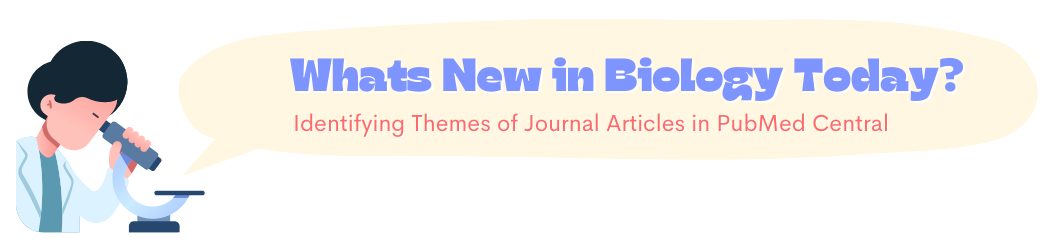

## <span style="color:#2f50a2;"> Executive Summary</span>


There has been an increasing trend in the number of scientific papers published, with the annual number more than doubling from 2003 to 2016. [1] Although this seems like good news, it is said that this has led to a crisis in academic publishing, with academic journals struggling to keep up with the amount of work to be reviewed, leading to a culture of quantity over quality. [2] Researchers are also negatively affected by this surge, having to spend precious time scouring over a multitude of papers that may or may not be relevant to their research.
 
This study aims to alleviate this problem by determining the overarching themes of journal articles in the field of biomedical science and life sciences, in order to easily provide summary statistics to researchers and academic publications to decrease the amount of time spent going through the ever-increasing amount of published articles in the field. The group analyzed text files of the PubMed Central dataset and performed Exploratory Data Analysis to uncover insights on the evolution of subject matters of interest, along with the length and frequency of articles published in PubMed Central per year.
 
After conducting the analysis, the following key insights were uncovered: The number of journal articles published per year had peaked at the year 2014, and these articles also contained as many as 10 to 15 key words in their titles and were generally around 5000 words in length. Indeed, this reflects the difficulty of the scientific community to keep up to date and study related literature to their topic. More importantly, the evolution of subject areas of interest for these articles was found to shift towards cancer and disease prevention and treatment as the years progressed. This is reflective of the significant increase in cancer incidence and may also be the reason that despite this increase, the mortality rate associated to cancer has been dropping. [4] These insights may aid researchers and academic publications to better manage their resources to be able to focus on this more popular area of interest.

## <span style="color:#2f50a2;"> Introduction</span>

### <span style="color:#2f50a2;"> Overview</span>

There has been a trend in doctoral education where universities have been aiming to become research-intensive, thus requiring their students to publish several journal articles instead of the customary PhD dissertation. Traditionally, research would have been evaluated instead by university committees before reaching publication. But now, the responsibility of evaluation has fallen onto the shoulders of the scientific community, which relies on the peer review system for evaluation. Because of this, an increasing amount of publications have been flooding and putting strain on the publication system and the scientific community. Even well known and respected academic publications such as The Review of Higher Education have had to stop accepting submissions, because of a backlog of articles that have been waiting to be reviewed or published for more than two years. [2]

The current situation has made it difficult for researchers to easily gather necessary information without sifting through a large number of publications–many of which may also be of poor quality due to the pressure on academics to publish. Scientists have also resorted to splitting their research into several parts in order to increase the quantity of their publications, making it even more tedious to review related literature. [3]

Given this predicament, there is a need to easily determine overarching themes of journal articles without having to go through each article individually. Due to the large amount of publications, it would be helpful if we could automatically extract useful information such as trending topics of interest and even the amount and length of journal articles published each year.


### <span style="color:#2f50a2;"> Research Questions</span>

The main objective of this study is to answer this question: **What are the overarching themes of journal articles in the field of biomedical sciences and life sciences that were published in PubMed Central?**

More specifically, this study aims to answer the following research questions:

1. How many journal articles are published in PubMed Central each year and what is the length of these articles?
2. What are the most frequently appearing words in the journal articles being published? What subject matters of interest are being covered by most of these journal articles?


### <span style="color:#2f50a2;"> Scope and Limitations</span>

1. **Study scope**: The study is focused on journal articles focusing on Biomedical and Life Sciences, and does not cover other natural sciences. However, the results may be replicated and applied to other fields as well.
2. **Data availability**: The publicly available dataset represents more than half of all the articles made available on PubMed Central, therefore the results may not fully completely represent the total articles that have been published. There are some articles published in this journal that were not made available publicly because of confidentiality reasons, along with restrictions on providing open-access to articles. However, the publicly available journal articles does provide a good approximation of the journals published through PubMed Central.

## <span style="color:#2f50a2;">Rationale</span>

1. **Researchers**: The results of this study aims to alleviate the pain of researchers that stems from sifting through a multitude of publications. Researchers may use these techniques to know whether an area of interest has been already commonly covered or whether it is relatively novel. With this study, researchers can easily determine what topics are frequent or not, and be better able to concentrate their efforts.

2. **Acedemic publications**: This study can also be of use to academic publications, where they can quickly find out what topics are popular amongst their accepted submissions. By determining the common topics being covered, they may be able to refocus their efforts on accepting more important and relevant research. They can also monitor the number of published articles to be able to anticipate counts of submissions in order to avoid a backlog.

## <span style="color:#2f50a2;">Data Description</span>

The dataset used was the `NIH NCBI PMC Article Datasets - Full-Text Biomedical and Life Sciences Journal Articles on AWS` from https://registry.opendata.aws/ . This data is from `PubMed Central (PMC)`, which is an archive of journal articles on the biomedical and life sciences field. It is managed by the U.S. National Institutes of Health’s National Library of Medicine (NIH/NLM) and is updated daily. The data was downloaded from the following s3 bucket: `s3://pmc-oa-opendata/author_manuscript/txt/all`. The dataset was composed of `.txt` files, each corresponding to the full text of a scientific journal article. [5]

## <span style="color:#2f50a2;">Methodology and Data Preprocessing</span>
<a id="S5"></a>
The methodology for this study is summarized in the following seven (7) steps, which will be discussed in the succeeding subsections.
<br>
<br>

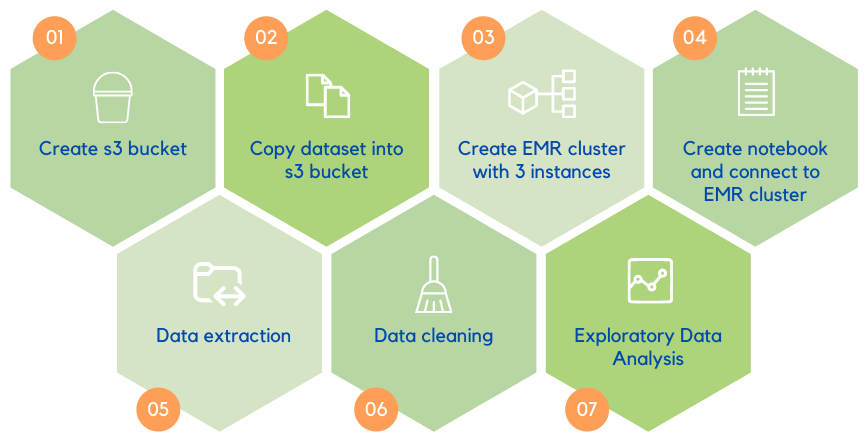

<left><left><b><font size=2> Figure 1. Methodology</font></b></left>
<br>

### <span style="color:#2f50a2;">Creating the s3 bucket</span>

An s3 bucket was first created with the following settings:
- AWS Region: `US East (N. Virginia) us-east-1` 
- ACLs: `enabled`
- Public access: `enabled`
- Bucket versioning: `disabled`
- Server-side encryption: `disabled`

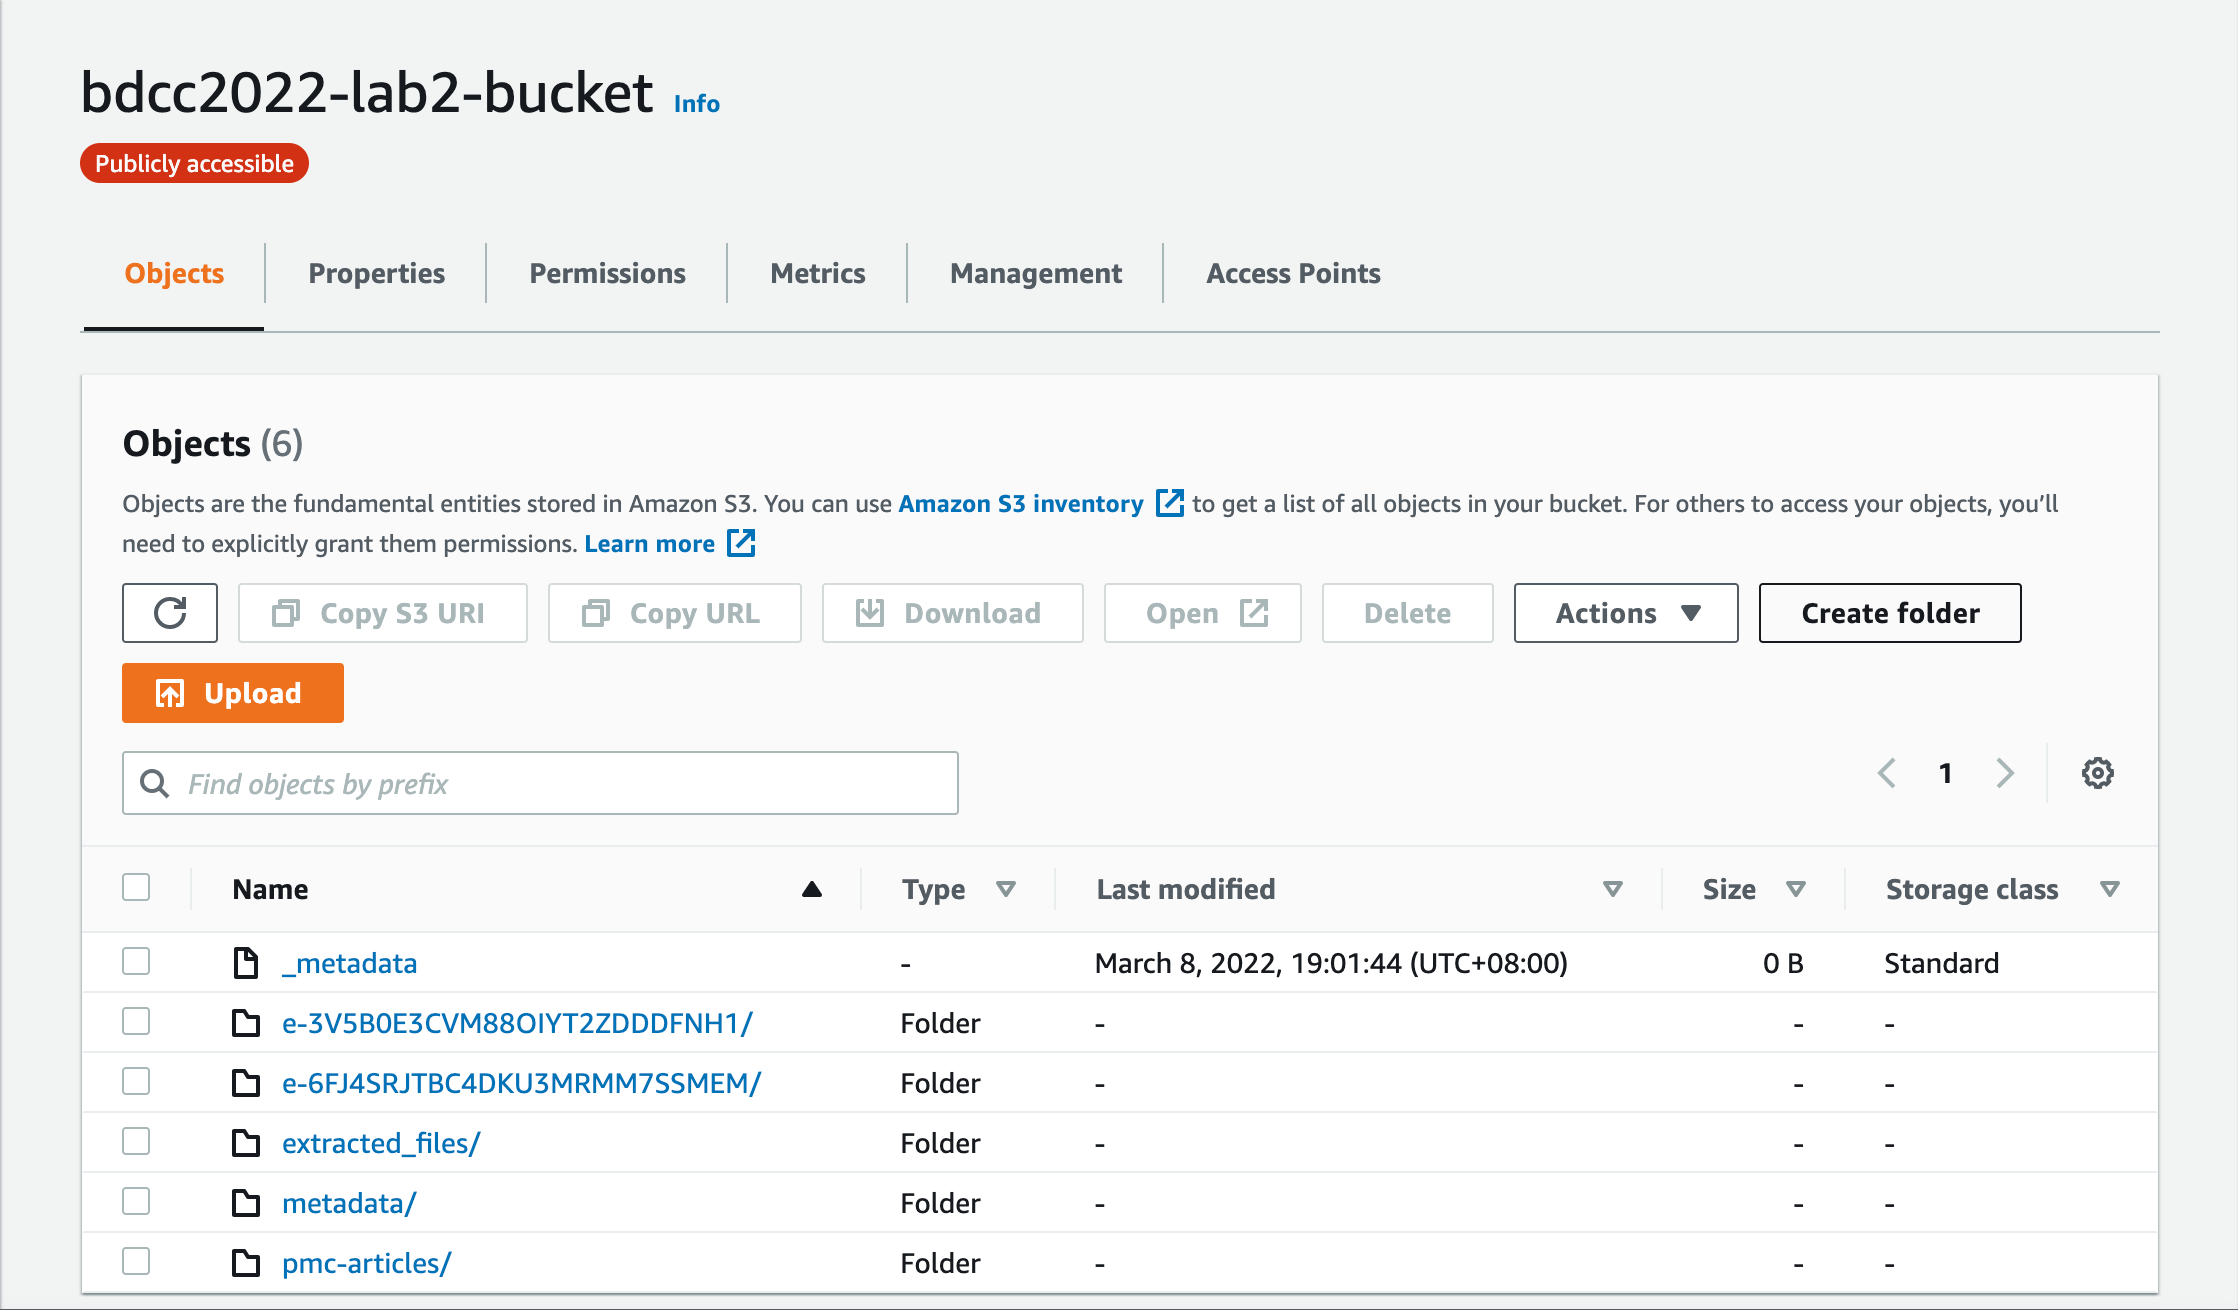

<left><left><b><font size=2> Figure 2. S3 Bucket</font></b></left>
<br>

### <span style="color:#2f50a2;">Copying data into s3 bucket</span>

The dataset was then copied to the created s3 bucket using the following command on the AWS console `aws s3 cp s3://pmc-oa-opendata/author_manuscript/txt/all s3a://bdcc2022-lab2-bucket/pmc-articles --recursive`

The team extracted 767,506 journal articles from the publicly available PMC database on AWS, which amounted to 36.2 GB all in all.

### <span style="color:#2f50a2;">Creating EMR cluster</span>

An EMR cluster was then created with the following configuration:
- Instances: 1 `m5.xlarge` Master, 4 `m5.xlarge` Cores
- Release label: `emr-6.5.0`
- Applications: `Hive 3.1.2`, `Pig 0.17.0`, `Hue 4.9.0`, `JupyterEnterpriseGateway 2.1.0`, `Spark 3.1.2`, `Livy 0.7.1`
- Availability zone: `us-east-1b`

A screenshot of the EMR instances can be found below:


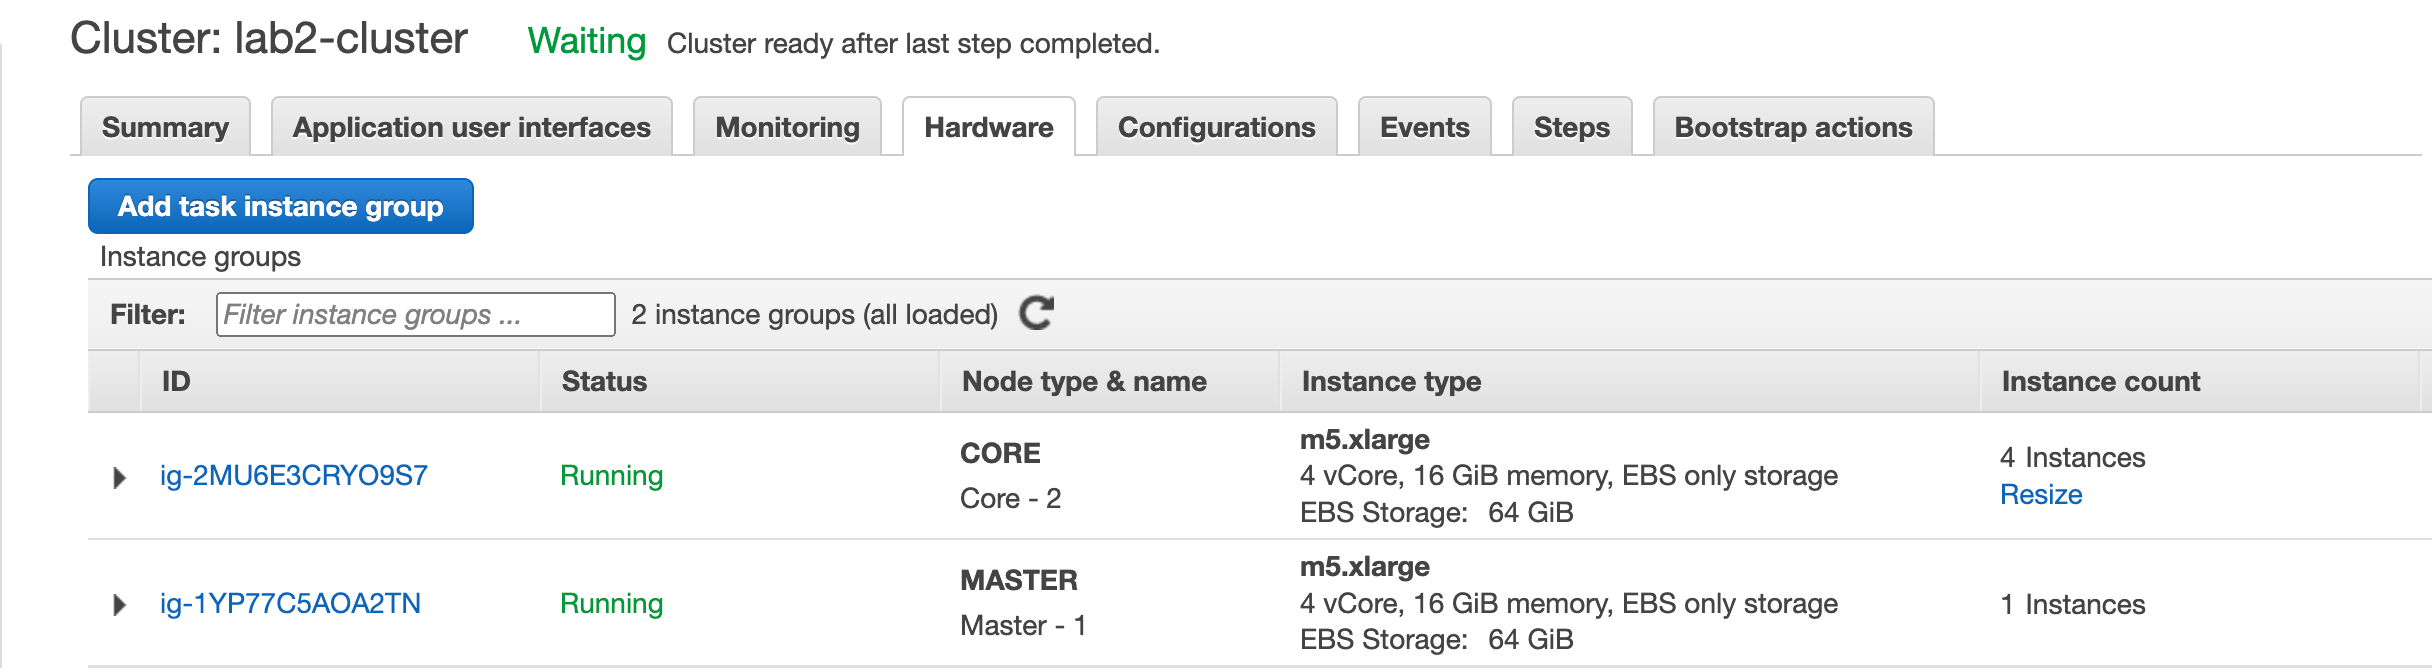

<left><left><b><font size=2> Figure 3. EMR Instances</font></b></left>
<br>

### <span style="color:#2f50a2;">Creating Notebook and connecting to EMR cluster</span>

A notebook was then created and connected to the EMR cluster. This notebook used a `Python3` kernel, with `PySpark` installed.



### <span style="color:#2f50a2;">Data Extraction</span>

To extract the necessary information from the collected files, the data first needed to be chunked into 3 parts. A custom function was then created and run on each chunk in order to do the extraction. The custom function utilized user defined functions and `Regex` to return a Spark Dataframe with columns corresponding to the title, publication date and content of each journal article. These generated Spark Dataframes were then converted to `parquet` files for faster processing, and were saved into the created s3 bucket.

By converting the data into parquet files, the total amount of data that was preprocessed was reduced to 18 GB.

In [1]:
# instantiate spark on Jupyter notebook without installing Java
import findspark
findspark.init()

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import (udf, split, col, regexp_replace,
                                   lower, trim, size, explode,
                                   date_format, desc, mean)
from pyspark.sql.types import StringType, ArrayType
from pyspark.sql.functions import explode
from pyspark.ml.feature import HashingTF, IDF, CountVectorizer
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap
import nltk
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
from nltk.corpus import stopwords
from pyspark.ml.feature import StopWordsRemover
from nltk.stem import WordNetLemmatizer 

import os
os.environ['AWS_PROFILE'] = 'default'

In [2]:
spark = (SparkSession
     .builder
     .master('local[*]')
     .getOrCreate())

In [3]:
def article_data_generator(path):
    """Return Spark Dataframe containing information about each article.
    
    This function would return the title, publication date, and the
    content of each journal article.
    
    Parameters
    ----------
    path : glob string
        The filepath of the journal articles to be processed.
        
    Returns
    -------
    Spark DataFrame containing title, publication date, and content of
    each journal article.
    """
    
    pattern = r'This file is available for text mining. '\
    'It may also be used consistent with the principles of '\
    'fair use under the copyright law.|This file is available to download '\
    'for the purposes of text mining, consistent with the principles of UK '\
    'copyright law.'

    udf_title = udf(lambda s: re.findall(r'Article\s(.*)', s)[0])
    udf_pub_date = udf(lambda s: re.split(pattern, s)[1][-40:])
    udf_content = udf(lambda s: re.split(pattern, s)[2])
    
    return (spark.read.text(path, wholetext=True)
            .select(udf_title('value').alias('title'),
                    udf_pub_date('value').alias('publication_date'),
                    udf_content('value').alias('content')))

In [ ]:
# DO NOT RUN
# chunk title, publication date, and content extraction
# from 800,000 txt files
# run this using Pyspark kernel to check progress bars
# will take roughly 5 hours to complete


article_data1 = article_data_generator('s3a://bdcc2022-lab2-bucket/'
                                       'pmc-articles/PMC[1-3]??????.txt')
article_data2 = article_data_generator('s3a://bdcc2022-lab2-bucket/'
                                       'pmc-articles/PMC[4-7]??????.txt')
article_data3 = article_data_generator('s3a://bdcc2022-lab2-bucket/'
                                       'pmc-articles/PMC[8-9]??????.txt')

# convert generated spark DataFrames to parquet files
# for faster processing
article_data1.write.parquet('s3a://bdcc2022-lab2-bucket/'
                            'extracted_files/articles', mode='append')
article_data2.write.parquet('s3a://bdcc2022-lab2-bucket/'
                            'extracted_files/articles', mode='append')
article_data3.write.parquet('s3a://bdcc2022-lab2-bucket/'
                            'extracted_files/articles', mode='append')

### <span style="color:#2f50a2;">Data Cleaning</span>

Once the titles and the content of the journal articles were extracted, further data cleaning was needed in order to conduct analysis on text. The following subsections discuss the processes involved for cleaning the extracted data.

#### <span style="color:#2f50a2;"> Tokenizing the Journal Articles</span>

The parquet files were then read, and user defined functions along with `PySpark` SQL functions were utilized to tokenize the title and content of each article and determine the word count for each title and article content. The year of publication of each article was also extracted.

In [4]:
# extract year from the publication date column, and tokenize
# generate sample data as a pandas DataFrame

tokenize = r'([0-9\n\(\)\!\"\"\[\]\.\&\#\$\'\,\-\/\?\+\*\:\;\|\–\~\=\%])'

udf_year = udf(lambda s: re.findall(r'\b20\d\d', s))
udf_extract = udf(lambda x: int(x[0]) if len(x) > 0 and
                  int(x[0]) <= 2022 else None)
udf_trim = udf(lambda s: re.sub('\s\s+', ' ', s))

articles = (spark.read.parquet('s3a://bdcc2022-lab2-bucket/'
                               'extracted_files/articles')
            .select(regexp_replace(lower(col('title')), tokenize, '')
                    .alias('title'), 
                    udf_extract(udf_year('publication_date')).alias('year'),
                    regexp_replace(lower(col('content')), tokenize, '')
                    .alias('content')))

articles = articles.select(trim(col('title')).alias('title'), 'year', 
                           trim(udf_trim('content')).alias('content'))

articles = articles.select(split(col('title'), ' ').alias('title'), 'year', 
                           split(col('content'), ' ').alias('content'))

articles = articles.select('title', size('title').alias('title_word_count'),
                           'year', 'content',
                           size('content').alias('content_word_count'))

articles.limit(20).toPandas()

,title,title_word_count,year,content,content_word_count
0,"[guidelines, for, the, use, of, flow, cytometr...",15,2019,"[abstractthese, guidelines, are, a, consensus,...",316837
1,"[international, consensus, statement, on, alle...",9,2020,"[backgroundcritical, examination, of, the, qua...",165117
2,"[copper, active, sites, in, biology]",5,2014,"[introductionbased, on, its, generally, access...",145820
3,"[heart, disease, and, stroke, statistics—]",5,2017,"[aha, scientific, statementscardiovascular, di...",124134
4,"[hrsehraecasaphrssolaece, expert, consensus, s...",12,2017,"[ablationarrhythmiaatrial, fibrillationatrial,...",133894
5,"[guidelines, for, the, prevention, and, treatm...",14,2014,"[summary, last, updated, november, last, revie...",135935
6,"[synthetic, fecu, complexes, toward, understan...",10,2018,"[hemecopper, oxidases, hcos, are, terminal, en...",127098
7,"[hmgb, in, health, and, disease]",5,2014,"[complex, genetic, and, physiological, variati...",102360
8,"[psychosocial, interventions, for, supporting,...",10,2013,"[backgroundtobacco, smoking, in, pregnancy, re...",104867
9,"[phosphine, organocatalysis]",2,2018,"[the, hallmark, of, nucleophilic, phosphine, c...",96369


<left><left><b><font size=2> Table 1. Tokenized Journal Articles</font></b></left>
<br>
<font size=2><font color="gray">Extracted information from the PMC database of journal articles.</font></font></left>

#### <span style="color:#2f50a2;"> Removing Stopwords from Journal Articles</span>

The `nltk` and `spacy` libraries were used to remove stop words from the titles and contents of articles. This is to decrease noise and remove commonly used words so more focus could be given to the rarer, more important words.

In [5]:
nltk_stop_words = list(stopwords.words('english'))
spacy_stop_words = list(en_stop)
additional_stop_words = ['', 'study', 'introduction', 'abstract',
                         'conclusion', 'methodology', 'literature',
                         'associated', 'analysis', 'b', 'cd', 'c',
                         'research', 'synthesis', 'outcome', 'predictor']

stop_words = nltk_stop_words + spacy_stop_words + additional_stop_words


# stopword removal
remover = StopWordsRemover(inputCols=['title', 'content'], 
                           outputCols=['cleaned_title', 'cleaned_content'],
                           stopWords=stop_words)

articles = remover.transform(articles)

#### <span style="color:#2f50a2;"> Lemmatizing the Text</span>

Lemmatization was then performed to transform the remaining words into their root form. This allowed the corpus of words to be more uniform, so that words such as "diseases" and "disease" may be counted as the same word.

In [6]:
# lemmatize the text

lemmatizer = WordNetLemmatizer()
stemmer_udf = udf(lambda tokens: [lemmatizer.lemmatize(token)
                                  for token in tokens],
                  ArrayType(StringType()))

articles = articles.select(
    stemmer_udf('cleaned_title').alias('cleaned_title'),
    'title_word_count', 'year',
    stemmer_udf('cleaned_content').alias('cleaned_content'),
    'content_word_count')

articles.limit(20).toPandas()

,cleaned_title,title_word_count,year,cleaned_content,content_word_count
0,"[guideline, use, flow, cytometry, cell, sortin...",15,2019,"[abstractthese, guideline, consensus, work, co...",316837
1,"[international, consensus, statement, allergy,...",9,2020,"[backgroundcritical, examination, quality, val...",165117
2,"[copper, active, site, biology]",5,2014,"[introductionbased, generally, accessible, iii...",145820
3,"[heart, disease, stroke, statistics—]",5,2017,"[aha, scientific, statementscardiovascular, di...",124134
4,"[hrsehraecasaphrssolaece, expert, consensus, s...",12,2017,"[ablationarrhythmiaatrial, fibrillationatrial,...",133894
5,"[guideline, prevention, treatment, opportunist...",14,2014,"[summary, updated, november, reviewed, novembe...",135935
6,"[synthetic, fecu, complex, understanding, heme...",10,2018,"[hemecopper, oxidase, hcos, terminal, enzyme, ...",127098
7,"[hmgb, health, disease]",5,2014,"[complex, genetic, physiological, variation, e...",102360
8,"[psychosocial, intervention, supporting, woman...",10,2013,"[backgroundtobacco, smoking, pregnancy, remain...",104867
9,"[phosphine, organocatalysis]",2,2018,"[hallmark, nucleophilic, phosphine, catalysis,...",96369


<left><left><b><font size=2> Table 2. Cleaned Text Data</font></b></left>
<br>
<font size=2><font color="gray">Stop words from Spacy and NLTK, along with NLTK's WordNet lemmatizer was used to preprocess the text.</font></font></left>

### <span style="color:#2f50a2;">Exploratory Data Analysis</span>

Exploratory Data Analysis could then be performed on the extracted features in order to determine interesting insights from the preprocessed data. This will be further discussed in the next section.

## <span style="color:#2f50a2;"> Exploratory Data Analysis</span>

Now that we have already preprocessed the text data, we can now perform exploratory data analysis on the `PMC` journal articles in order to be able to gauge what are the topics being explored in the field of biological and life sciences.

We also load below the metadata of all the manuscript journal articles from `PMC` in order to get more information regarding the text, such as the time in which the article was last updated in the database and the publication date.

In [49]:
article_info = (spark.read.csv('s3a://bdcc2022-lab2-bucket/'
                               'metadata/csv/'
                               'author_manuscript.filelist.csv',
                               header=True))

update_time = (article_info.select(
    date_format('Last Updated UTC (YYYY-MM-DD HH:MM:SS)', 'yyyy-MM')
    .alias('update_time'))
               .groupBy('update_time')
               .count()
               .orderBy(desc('update_time')))

In [ ]:
published_per_yr = (articles.filter('year is not NULL')
                    .select('year')
                    .groupBy('year')
                    .count()
                    .orderBy('year')
                    .toPandas())

### <span style="color:#2f50a2;"> Journal Articles Publication Date </span>

From the plot below, it can be seen that most of the journal articles that are made available in the `PMC` database are published in 2014. Likewise, the plot shows that there is an increasing number of journal article publications shared in `PMC` up until 2014. After this year, the number of journal articles that are submitted to `PMC` or are made public have declined.

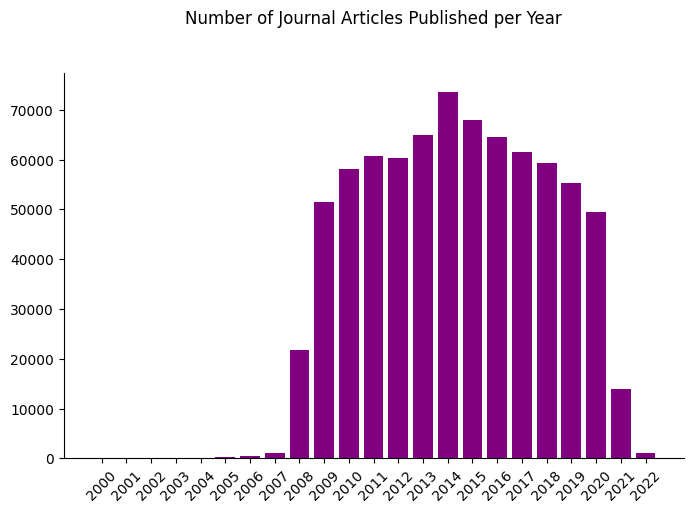

In [24]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(published_per_yr['year'], published_per_yr['count'],
       color='purple')
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Number of Journal Articles Published per Year\n\n',
             fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

<left><left><b><font size=2> Figure 4. Journal Articles Published per Year</font></b></left>
<br>
<font size=2><font color="gray">2014 seemed to be a year of publications in the biological & life sciences field.</font></font></left>

### <span style="color:#2f50a2;"> Number of Journal Articles Updated per Month-Year </span>

We can see from the plot below that most of the journal articles in the `PMC` database were updated in June 2021. This date showed a much higher number by far compared to the other Month-Years observed.

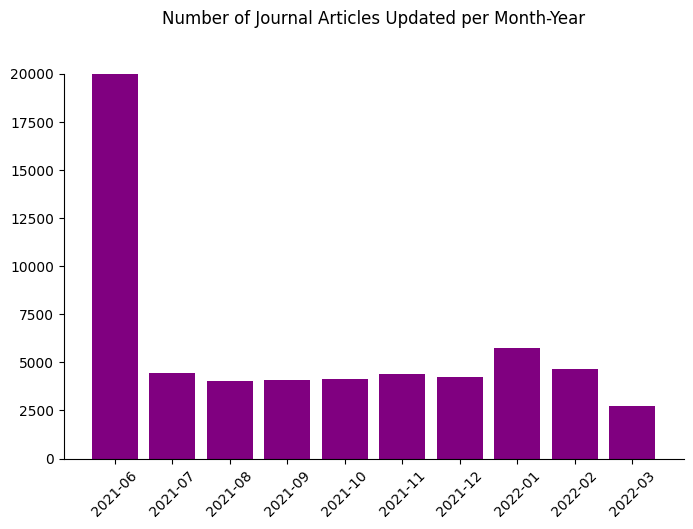

In [50]:
update_df = update_time.toPandas().sort_values(by='update_time')

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(update_df['update_time'], update_df['count'], color='purple')
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Number of Journal Articles Updated per Month-Year\n\n',
             fontsize=12)
ax.set_ylim(0, 20000)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

<left><left><b><font size=2> Figure 5. Time of Journal Article Updating</font></b></left>
<br>
<font size=2><font color="gray">Most of the journal articles made available in the PMC database were updated during June 2021.</font></font></left>

In [65]:
# takes 30 mins to run

bins, freq = (articles.select(articles['title_word_count']
                              .cast('int'))
              .rdd
              .map(lambda x: x['title_word_count'])
              .histogram(list(range(0, 30))))

### <span style="color:#2f50a2;"> Title Word Counts </span>

We can see that after performing preprocessing on the text, most journal articles published contained around ten to fifteen key words in their title, with some articles having as few as 1 key word and others as many as 28.

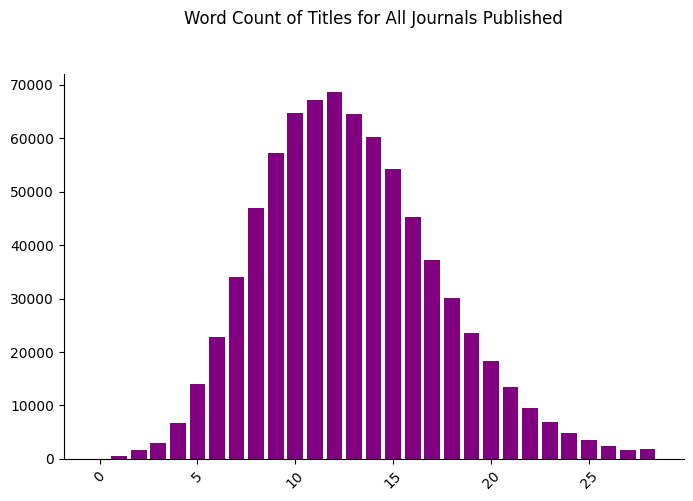

In [66]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x=bins[:-1], height=freq, color='purple')
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Word Count of Titles for All Journals Published\n\n',
             fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

<left><left><b><font size=2> Figure 6. Word Count of Journal Article Titles</font></b></left>
<br>
<font size=2><font color="gray">Most of the journal articles in the PMC database have titles that have at least ten to fifteen words.</font></font></left>

In [74]:
# takes 30 mins to run

bins1, freq1 = (articles.select(articles['content_word_count']
                                .cast('int'))
                .rdd
                .map(lambda x: x['content_word_count'])
                .histogram(list(np.linspace(0, 1000000, 1001))))

### <span style="color:#2f50a2;"> Article Word Counts</span>

Examining the word counts per article, we can see that most journal articles were around 5000 words in length. Note that this plot shows word counts after preprocessing the text data, therefore researchers have to go through journal articles that are actually lengthier than this.

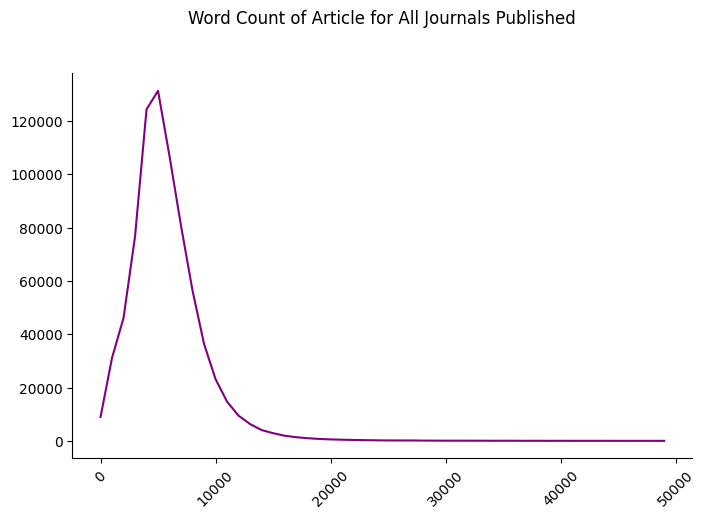

In [109]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(np.array(bins1[:50]), np.array(freq1[:50]), color='purple')
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Word Count of Article for All Journals Published\n\n',
             fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

<left><left><b><font size=2> Figure 7. Word Count of Manuscripts</font></b></left>
<br>
<font size=2><font color="gray">Most manuscripts of the journal articles in the PMC database tend to be at least 5000 words in length, including references.</font></font></left>

In [24]:
# mean word count per year
# takes roughly 1.5 hours to run

mean_wc_per_yr_title = (articles.filter('year is not NULL')
                        .select('year', 'title_word_count')
                        .groupBy('year')
                        .agg(mean('title_word_count'))
                        .alias('mean_wc')
                        .orderBy('year')
                        .toPandas())

mean_wc_per_yr_content = (articles.filter('year is not NULL')
                          .select('year', 'content_word_count')
                          .groupBy('year')
                          .agg(mean('content_word_count'))
                          .alias('mean_wc')
                          .orderBy('year')
                          .toPandas())

### <span style="color:#2f50a2;"> Mean Word Counts per Year </span>

An increasing yearly trend can be observed when examining the mean word count of paper titles, as well as the mean word count of journal articles. In the early years of the 21st century, articles are roughly 5,500 words long and titles tend to be around ten words only. Twenty years later, the number of words in journal article titles have increased by 30% and the word count of journal articles went up to 6,800 on the average. This may be reflective of the amount of information being included in journal articles, where researchers have been incorporating more and more content in their scientific papers in order to produce work that has a high degree of novelty.

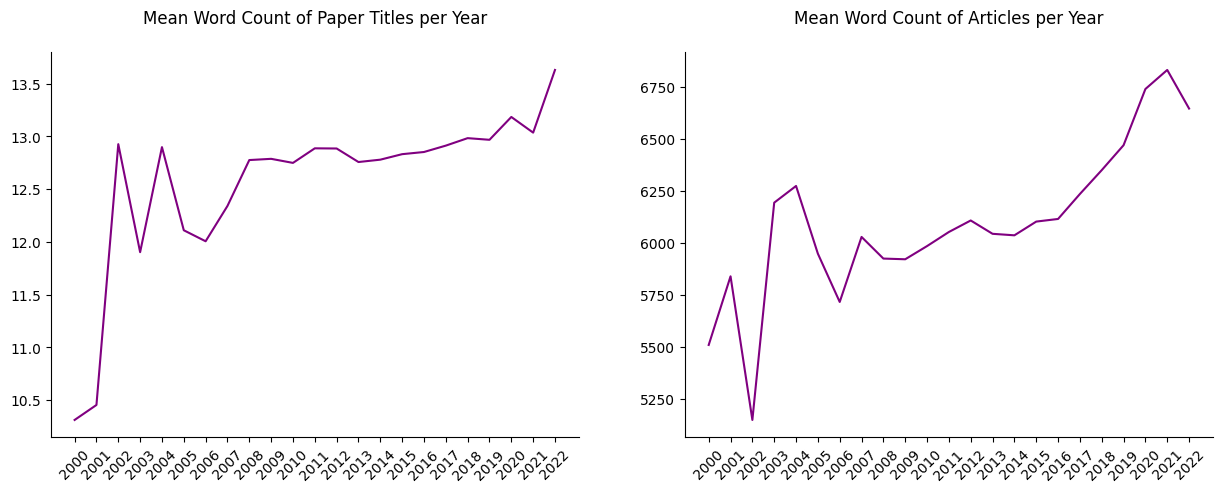

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax = ax.flatten()

ax[0].plot(mean_wc_per_yr_title['year'],
           mean_wc_per_yr_title['avg(title_word_count)'],
           color='purple')
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_title('Mean Word Count of Paper Titles per Year\n',
                fontsize=12)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)


ax[1].plot(mean_wc_per_yr_content['year'],
           mean_wc_per_yr_content['avg(content_word_count)'],
           color='purple')
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_title('Mean Word Count of Articles per Year\n',
                fontsize=12)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False);

plt.show()

<left><left><b><font size=2> Figure 8. Average Word Count of Papers per Year</font></b></left>
<br>
<font size=2><font color="gray">On the average, it seems that the length of published journal articles in PMC has been increasing.</font></font></left>

In [ ]:
# takes around 25 mins to run

top200_words = (articles.select(explode('cleaned_title')
                               .alias('tokens'))
                .groupBy('tokens')
                .count()
                .orderBy(desc('count'))
                .limit(200)
                .toPandas())

### <span style="color:#2f50a2;"> Most Common Words in Titles </span>

The figure below shows a visualization of the top 200 most common words across all titles in the `PMC` database. We can see that `cell` is used frequently, reflecting the fact that these are articles in the field of biomedical sciences and life sciences. The second most frequent word is `cancer`, which reflects the importance placed on research for this prevalent disease. 

We can also see that words such as `risk`, `factors`, `treatment` and `disease` which may indicate that journal articles are focusing on determining the factors that contribute to being at risk for certain diseases, and the treatments being explored by researchers. Another frequently occuring word is `human response`, which may indicate research focusing on how humans respond to varied types of treatment.

Lastly, one interesting insight that can be observed is the frequent occurence of the words `stress`, `disorder` and `therapy`, which could possibly be due to the rise in mental health issues and their link to our overall health.

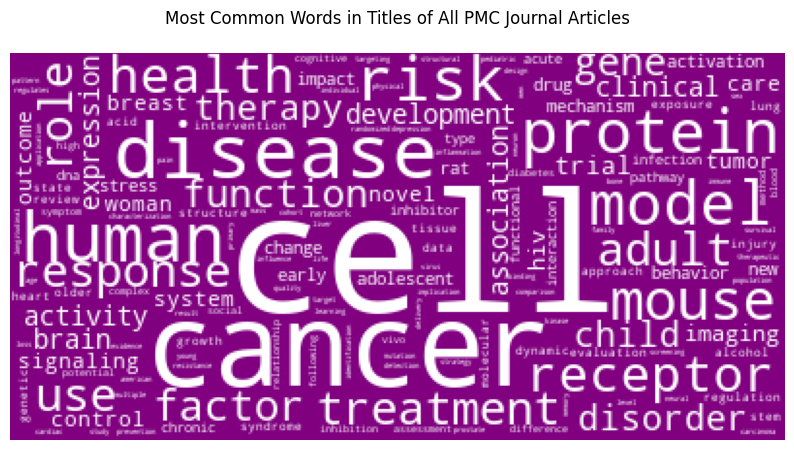

In [87]:
def wordcloud_plotting(freq, cmap, bg_color, add_stop):
    """Visualize a wordcloud from the word frequencies."""
    freq = freq[~(freq['tokens'].isin(add_stop))]
    freq = freq.set_index('tokens').squeeze()
    wordcloud = WordCloud(background_color=bg_color,
                          relative_scaling=1, colormap=cmap)
    wordcloud.generate_from_frequencies(freq)
    return wordcloud

more_stop = ['effect', 'patient']
wordcloud = wordcloud_plotting(top200_words, 
                               ListedColormap(['#FFFFFF']), 'purple',
                               more_stop)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.title('Most Common Words in Titles of All PMC Journal Articles\n',
          fontsize=12)
plt.axis('off')
plt.show()

<left><left><b><font size=2> Figure 9. Most Common Words in the PMC Database</font></b></left>
<br>
<font size=2><font color="gray">Most of the articles in the PMC database tend to explore about cancer.</font></font></left>

### <span style="color:#2f50a2;"> Evolution of Topics over Time</span>

The figures below show how the topics of published papers have evolved over time. The top 200 most frequently occuring words were visualized for the years 2000-2007, 2008-2012, 2013-2017 and 2017-2022.

It is worth noting that in 2000 to 2007, there was not much emphasis placed on `cancer` compared to other years. Articles from this period may have concentrated more on exploration of `cells`, `genes` and `protein`. The keyword `disease` was also not as prevalent during this period, although it appears more frequently in later years, which is an interesting insight uncovered. 

When examining the years 2008 to 2012, the keywords `cancer` and `disease` have started to appear more frequently. We can also see the appearance of the words `risk`, `factor`, `role` and `response`. This may indicate that research started to focus more on the causes of cancer and other diseases, where scientists try to identify the factors that contribute to being at risk for certain diseases and the response of the human body towards them.

For the years 2013 to 2017, we see that there is a progressive increase in frequency of the terms `cancer`, `disease` and `treatment`, which may reflect the increase in cancer incidence over the years and the increased focus of research for its treatment and prevention. Other diseases such as `hiv` have also appeared in the most frequent words during this period, however it is interesting to note that it did not appear as frequently in the subsequent years.

Lastly, for the years 2017 to 2022, we again see an increase in frequency of the words `cancer`, `disease` and `treatment`, reflecting the trend shown in previous years. However, an interesting finding is that the word `therapy` and `disoreder` were more frequently observed in this period. This could possibly be due to the increase in mental health issues observed in recent years.

In [9]:
## takes two hours to complete queries

year_bin_1 = (articles.select(articles['year'].cast('int'), 
                              explode('cleaned_title')
                              .alias('tokens'))
              .filter(articles['year'] < 2008)
              .drop('year')
              .groupBy('tokens')
              .count()
              .orderBy(desc('count'))
              .limit(200)
              .toPandas())

year_bin_2 = (articles.select(articles['year'].cast('int'), 
                              explode('cleaned_title')
                              .alias('tokens'))
              .filter((articles['year'] >= 2008) & 
                      (articles['year'] < 2013))
              .drop('year')
              .groupBy('tokens')
              .count()
              .orderBy(desc('count'))
              .limit(200)
              .toPandas())

year_bin_3 = (articles.select(articles['year'].cast('int'), 
                              explode('cleaned_title')
                              .alias('tokens'))
              .filter((articles['year'] >= 2013) & 
                      (articles['year'] < 2018))
              .drop('year')
              .groupBy('tokens')
              .count()
              .orderBy(desc('count'))
              .limit(200)
              .toPandas())

year_bin_4 = (articles.select(articles['year'].cast('int'), 
                              explode('cleaned_title')
                              .alias('tokens'))
              .filter(articles['year'] >= 2018)
              .drop('year')
              .groupBy('tokens')
              .count()
              .orderBy(desc('count'))
              .limit(200)
              .toPandas())

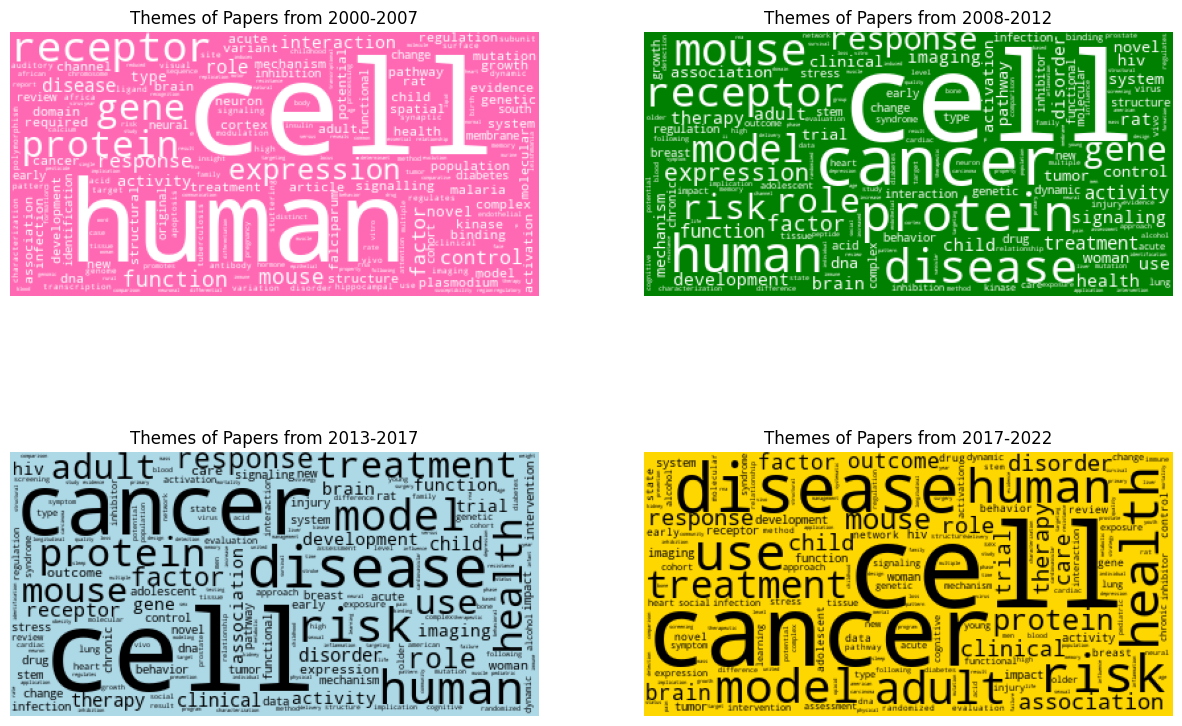

In [20]:
wordcloud_1 = wordcloud_plotting(year_bin_1, 
                                 ListedColormap(['#FFFFFF']),
                                 'hotpink', more_stop)

wordcloud_2 = wordcloud_plotting(year_bin_2, 
                                 ListedColormap(['#FFFFFF']),
                                 'green', more_stop)

wordcloud_3 = wordcloud_plotting(year_bin_3, 
                                 ListedColormap(['black']),
                                 'lightblue', more_stop)

wordcloud_4 = wordcloud_plotting(year_bin_4, 
                                 ListedColormap(['black']),
                                 'gold', more_stop)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax = ax.flatten()

ax[0].imshow(wordcloud_1)
ax[0].axis('off')
ax[0].set_title('Themes of Papers from 2000-2007')

ax[1].imshow(wordcloud_2)
ax[1].axis('off')
ax[1].set_title('Themes of Papers from 2008-2012')

ax[2].imshow(wordcloud_3)
ax[2].axis('off')
ax[2].set_title('Themes of Papers from 2013-2017')

ax[3].imshow(wordcloud_4)
ax[3].axis('off')
ax[3].set_title('Themes of Papers from 2017-2022')

plt.show()

<left><left><b><font size=2> Figure 10. Evolution of Topics of Published Papers per Year</font></b></left>
<br>
<font size=2><font color="gray">Journal articles related to cancer has been published in PMC since 2008, but has became more prevalentin 2013 onwards.</font></font></left>

## <span style="color:#2f50a2;"> Conclusions</span>

Based on the results of the group's analysis of the journal articles published in PubMed Central for biomedical sciences and life sciences, it was revealed that the length of articles and even their titles have been increasing throughout the years, which relates to the difficulty that researchers and academic publications experience when reviewing and studying the latest research in this field.

More importantly, the study was able to uncover that the overarching themes of the journal articles has evolved over the years to concentrate mainly on **Cancer** and **Disease**. It was found that in earlier years, research focused generally on exploration of proteins and genes, with less emphasis placed on the occurrence of diseases. However, in later years the terms `cancer`, `disease`, `risk` and `treatment` were observed more frequently. This reflects the increasing trend of cancer incidence observed worldwide, along with the emphasis placed on treatment and prevention of this disease. [6] This may also be related to the fact that the mortality rate due to cancer has also been dropping in recent years, possibly due to the increase in research devoted to this subject area. 

The study also found that research on diseases such as `HIV` occurred the most in the years 2013-2017, and that a shift towards the connection of mental health to the human body may be observed in the most recent years of 2017-2022 due to the frequent appearance of words such as `therapy`, `disorder` and `stress`. Indeed, research has evolved to tackle the more prevalent issues that have been plaguing the population throughout the years.

## <span style="color:#2f50a2;"> Recommendations </span>

For data scientists that would like to have a deeper understanding of the journal articles published in PMC, we recommend implementing clustering algorithms on the text data in order to uncover additional insights. This could enable us to group journal articles together based on their similarity and also find common themes among all journal articles that were published at PMC in the entire 21st century.

Likewise, information retrieval methods could also be explored in order to discover the articles that are similar in theme or content. A recommender system could also be designed to suggest related articles to interested parties - such as researchers, hospitals, and other institutions operating in the medical field. With a recommender system, researchers may be able to input their field of interest and a model could suggest to them related topics that are currently popular among scientific publications. Instead of having to scour through a multitude of scientific journals, machine learning can be used to help scientists use their time more efficiently. This recommender system may also be able to suggest unexplored topics that researchers may be interested in doing further studies on, to aid them in identifying more novel areas of research. By doing so, the system could further aid the scientific community to zero in on topics more relevant to their topics of interest.

For researchers in the medical field, some areas that could potentially serve as a niche field of research would include `HIV` (which peaked at around 2013 to 2017) along with issues relating to mental health. Novel insights from these areas could be uncovered in order to help support the medical field in providing recommended treatments or remedies to these sicknesses. Given that articles of these themes are not that prevalent yet in PMC, being able to gain new insights from these fields would be value-adding for PMC in order to boost the diversity of its research outputs.

## <span style="color:#2f50a2;">References</span>

[1] What a massive database of retracted papers reveals about science publishing’s “death penalty.” (n.d.). Www.science.org. https://www.science.org/content/article/what-massive-database-retracted-papers-reveals-about-science-publishing-s-death-penalty

[2] Too much academic research is being published. (n.d.). University World News. https://www.universityworldnews.com/post.php?story=20180905095203579

[3] Crisis in basic research: scientists publish too much. (2017, February 13). Sciencenordic.com. https://sciencenordic.com/academia-basic-research-basic-research-crisis/crisis-in-basic-research-scientists-publish-too-much/1442296

[4] Incidence | Cancer Trends Progress Report. (n.d.). Progressreport.cancer.gov. Retrieved March 8, 2022, from https://progressreport.cancer.gov/diagnosis/incidence

[5] NIH NCBI PMC Article Datasets - Full-Text Biomedical and Life Sciences Journal Articles on AWS - Registry of Open Data on AWS. (n.d.). Registry.opendata.aws. Retrieved March 8, 2022, from https://registry.opendata.aws/ncbi-pmc/

[6] Sung, H., Ferlay, J., Siegel, R. L., Laversanne, M., Soerjomataram, I., Jemal, A., & Bray, F. (2021). Global cancer statistics 2020: GLOBOCAN estimates of incidence and mortality worldwide for 36 cancers in 185 countries. CA: A Cancer Journal for Clinicians, 71(3), 209–249. https://doi.org/10.3322/caac.21660



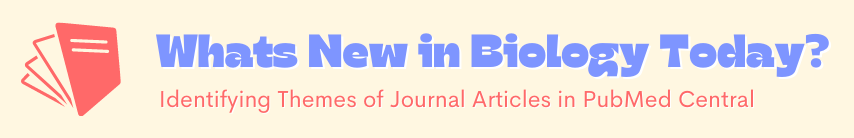